In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [2]:
# Read Training Data In

df = pd.read_csv('gs://sean_sullivan_projects/MLB_EVOE_Project/January_2022_Data/January_2022_Refresh_Data_Training.csv')

df.shape

(424575, 93)

In [3]:
# columns

df.columns

Index(['pitch_type', 'game_date', 'release_speed', 'release_pos_x',
       'release_pos_z', 'player_name', 'batter', 'pitcher', 'events',
       'description', 'spin_dir', 'spin_rate_deprecated',
       'break_angle_deprecated', 'break_length_deprecated', 'zone', 'des',
       'game_type', 'stand', 'p_throws', 'home_team', 'away_team', 'type',
       'hit_location', 'bb_type', 'balls', 'strikes', 'game_year', 'pfx_x',
       'pfx_z', 'plate_x', 'plate_z', 'on_3b', 'on_2b', 'on_1b',
       'outs_when_up', 'inning', 'inning_topbot', 'hc_x', 'hc_y',
       'tfs_deprecated', 'tfs_zulu_deprecated', 'fielder_2', 'umpire', 'sv_id',
       'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot',
       'hit_distance_sc', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'game_pk', 'pitcher_1',
       'fielder_2_1', 'fielder_3', 'fielder_4', 'fielder_5', 'fielder_6',
       'fielder_7', 'fielder_8', 'fielder_9', 'release_pos_y',
       'estima

In [4]:
# Numeric Variable Exploration

num_var = df[['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'launch_speed', 
              'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']]

In [5]:
num_var.describe().T

,count,mean,std,min,25%,50%,75%,max
release_speed,424553.0,88.798635,5.800155,38.100000,84.800000,90.000000,93.300000,104.300000
release_pos_x,424553.0,-0.790019,1.944780,-5.380000,-2.180000,-1.530000,1.060000,5.730000
release_pos_z,424553.0,5.876864,0.510650,0.010000,5.620000,5.910000,6.200000,8.610000
pfx_x,424553.0,-0.198198,0.893293,-3.780000,-0.970000,-0.310000,0.520000,2.520000
pfx_z,424553.0,0.702425,0.704498,-3.390000,0.310000,0.830000,1.240000,4.050000
plate_x,424553.0,0.000023,0.557024,-5.730000,-0.400000,0.000000,0.400000,11.300000
plate_z,424553.0,2.327696,0.569634,-3.080000,1.930000,2.320000,2.720000,9.600000
vx0,424553.0,2.403462,5.802372,-17.308003,-2.505515,4.339494,6.641375,17.960186
vy0,424553.0,-129.057909,8.402662,-151.890909,-135.527283,-130.823551,-123.310004,-54.554375
vz0,424553.0,-4.108115,2.671727,-14.773393,-5.944635,-4.323049,-2.477211,13.946815


In [6]:
# Categorical Variable Exploration

cat_var = df[['pitch_type', 'zone', 'p_throws', 'stand', 'pitch_name']]

In [7]:
for i in cat_var:
    print()
    print(cat_var[i].value_counts())
    print('---------------------------------------------')


FF    140164
SL     66138
CH     50754
FT     47586
SI     45708
CU     29759
FC     27104
KC      9323
FS      6762
KN       711
FA       189
EP        92
FO        61
CS        45
SC        18
Name: pitch_type, dtype: int64
---------------------------------------------

5.0     63267
8.0     47614
4.0     46821
6.0     45368
9.0     34478
7.0     31447
14.0    28771
2.0     28113
13.0    25236
1.0     20892
3.0     18785
11.0    18173
12.0    15588
Name: zone, dtype: int64
---------------------------------------------

R    308563
L    116012
Name: p_throws, dtype: int64
---------------------------------------------

R    250581
L    173994
Name: stand, dtype: int64
---------------------------------------------

4-Seam Fastball    140164
Slider              66138
Changeup            50754
2-Seam Fastball     47586
Sinker              45708
Curveball           29804
Cutter              27104
Knuckle Curve        9323
Split-Finger         6762
Knuckleball           711
Fastball       

<br>
<br>

# No Nulls Batted Ball Issue Investigation

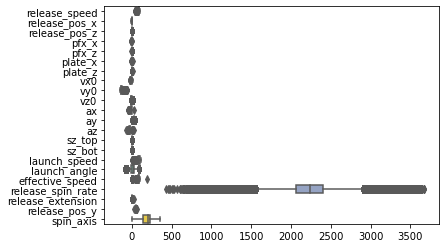

In [8]:
# Evaluate Outliers for Numeric Variables

ax = sns.boxplot(data=num_var, orient='h', palette='Set2')

Text(0.5, 0, 'Launch Speed (Exit Velocity) Distribution')

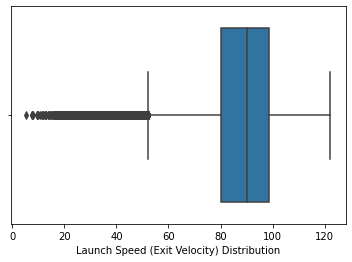

In [9]:
# Launch Speed

ax = sns.boxplot(x=num_var['launch_speed'])
ax.set_xlabel('Launch Speed (Exit Velocity) Distribution')

<br>

**Overall Distribution**

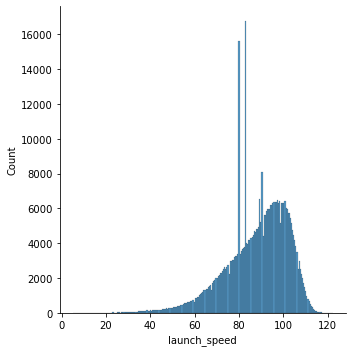

In [10]:
# Histogram of Launch Speed (No Filters)

sns.displot(df.launch_speed)

**Interpretation:**
You can clearly see that there is something odd going on here. The unusually high volume of launch speeds are a reflection of MLB's solution to handle batted ball events not properly measured by Statcast.

Now, let's evaluate ground balls (as an example) for each year present in the data (2017-2020). 

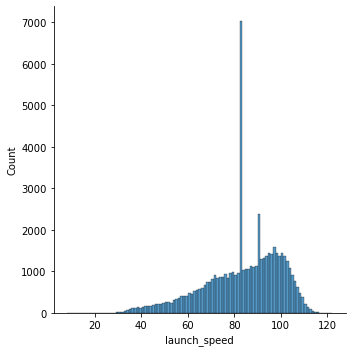

In [11]:
# Histogram for 2017

sns.displot(df[(df.bb_type == 'ground_ball') & (df.game_year == 2017)].launch_speed)

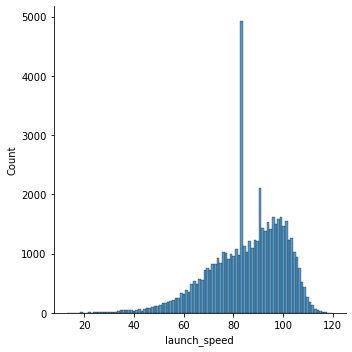

In [12]:
# Histogram for 2018

sns.displot(df[(df.bb_type == 'ground_ball') & (df.game_year == 2018)].launch_speed)

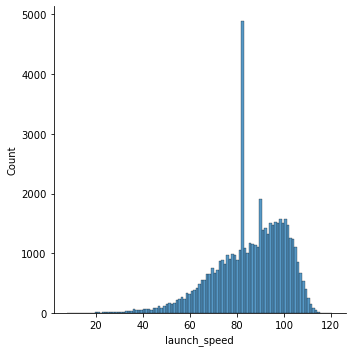

In [13]:
# Histogram for 2019

sns.displot(df[(df.bb_type == 'ground_ball') & (df.game_year == 2019)].launch_speed)

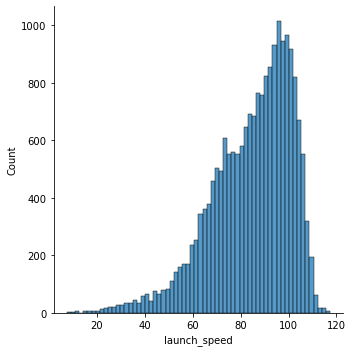

In [14]:
# Histogram for 2020

sns.displot(df[(df.bb_type == 'ground_ball') & (df.game_year == 2020)].launch_speed)

**Interpretation:**

It is no surprise to see the distribution "improve" once we got to 2020. This is when MLB introduced the use of Hawk-Eye. Per MLB's website: 

 "the Hawk-Eye Statcast system utilizes a total of 12 cameras around the park for full-field optical pitch, hit and player tracking. Five cameras operating at 100 frames per second are primarily dedicated to pitch tracking, while an additional seven cameras are focused on tracking players and batted balls at 50 frames per second.

That's compared to a single radar and two sets of three cameras apiece in the old system, and so far, so good. Now, what does this mean to you, the interested observer? At the lowest possible hanging fruit level, it means simply that more balls are being tracked. With the old radar/camera system, about 89% of batted balls were tracked; this year, through the end of August, that number is more like 99%. That's noticeable, right away."

**But what do we do with the imputed launch speed and launch angle values that led to this strange distribution? We will use Andrew Perpetua's solution to mark which occurences were likely an imputed batted ball, and drop them from the data-set.** Here is an article Perpetua wrote for The Hardball Times & Fangraphs on his solution: https://tht.fangraphs.com/43416-2/. 

Using the provided guidelines, I first evaluated the data for the presence of combinations of (launch speed, launch angle, and batted ball) that had suspiciously high occurences within the data. Below is a quick snap shot of what I observed. 

<br>

### No Null Occurences

In [15]:
# Filter years and columns to make groupby quicker

df_2017 = df[(df.game_year == 2017)]
df_final_2017 = df_2017[['launch_speed', 'launch_angle', 'bb_type']]
df_final_2017 = df_final_2017.dropna()


print(df_final_2017.shape)

df_final_2017[['launch_speed', 'launch_angle', 'bb_type']].value_counts().sort_values(ascending=False).head(20)

(127207, 3)


launch_speed  launch_angle  bb_type    
82.9          -21           ground_ball    6025
80.0           69           popup          3398
90.3          -17           ground_ball    1116
89.2           39           fly_ball        550
90.4           15           line_drive      121
91.1           18           line_drive      115
98.8           17           line_drive      101
102.8          30           fly_ball         99
90.2          -13           ground_ball      94
104.4          24           line_drive       40
93.1           32           fly_ball         37
71.4           36           fly_ball         19
100.8          15           line_drive       17
98.4           18           line_drive       17
101.8          19           line_drive       17
102.5          11           line_drive       17
103.3          8            line_drive       17
101.2          16           line_drive       16
96.9           14           line_drive       16
97.2           19           line_drive       15


In [16]:
# 2018

df_2018 = df[(df.game_year == 2018)]
df_final_2018 = df_2018[['launch_speed', 'launch_angle', 'bb_type']]
df_final_2018 = df_final_2018.dropna()


print(df_final_2018.shape)

df_final_2018[['launch_speed', 'launch_angle', 'bb_type']].value_counts().sort_values(ascending=False).head(20)

(125977, 3)


launch_speed  launch_angle  bb_type    
80.0           69           popup          4272
82.9          -21           ground_ball    3869
90.3          -17           ground_ball     705
89.2           39           fly_ball        406
102.8          30           fly_ball        102
91.1           18           line_drive       39
90.4           15           line_drive       35
90.2          -13           ground_ball      31
98.8           17           line_drive       21
98.9           20           line_drive       18
92.8           30           fly_ball         17
101.4          15           line_drive       17
91.6           22           line_drive       17
99.7           17           line_drive       17
102.1          13           line_drive       16
94.3           15           line_drive       16
97.0           23           line_drive       15
98.5           18           line_drive       15
100.5          17           line_drive       15
               10           line_drive       15


In [17]:
# 2019

df_2019 = df[(df.game_year == 2019)]
df_final_2019 = df_2019[['launch_speed', 'launch_angle', 'bb_type']]
df_final_2019 = df_final_2019.dropna()


print(df_final_2019.shape)

df_final_2019[['launch_speed', 'launch_angle', 'bb_type']].value_counts().sort_values(ascending=False).head(20)

(125184, 3)


launch_speed  launch_angle  bb_type    
80.0           69           popup          4433
82.9          -21           ground_ball    3801
90.3          -17           ground_ball     639
89.2           39           fly_ball        417
102.8          30           fly_ball         30
90.2          -13           ground_ball      23
97.7           18           line_drive       19
102.1          11           line_drive       18
99.8           17           line_drive       17
103.9          9            line_drive       16
103.8          9            line_drive       16
98.8           12           line_drive       16
96.1           18           line_drive       16
99.0           16           line_drive       15
97.1           4            ground_ball      15
105.2          5            ground_ball      15
98.2           14           line_drive       15
98.3           18           line_drive       15
96.3           15           line_drive       15
99.7           2            ground_ball      15


In [18]:
# 2020

df_2020 = df[(df.game_year == 2020)]
df_final_2020 = df_2020[['launch_speed', 'launch_angle', 'bb_type']]
df_final_2020 = df_final_2020.dropna()


print(df_final_2020.shape)

df_final_2020[['launch_speed', 'launch_angle', 'bb_type']].value_counts().sort_values(ascending=False).head(20)

(46207, 3)


launch_speed  launch_angle  bb_type    
100.8         -1            ground_ball    9
102.4          1            ground_ball    9
101.8          9            line_drive     9
96.6           26           line_drive     9
101.2          18           line_drive     9
101.0          14           line_drive     8
101.4          3            ground_ball    8
100.8          23           line_drive     8
99.6           3            ground_ball    8
98.1           13           line_drive     8
94.1           16           line_drive     8
100.6          24           line_drive     8
102.7          15           line_drive     8
105.6          0            ground_ball    8
101.0          19           line_drive     8
101.5          16           line_drive     7
98.6           16           line_drive     7
99.7           8            line_drive     7
105.8          15           line_drive     7
89.2           16           line_drive     7
dtype: int64

<br>

### Now, let's look at distributions with No Null observations removed

In [19]:
# Filter Out No Nulls

df_nn_removed = df[(df.no_nulls_flag == 0)]

df_nn_removed.shape

(393655, 93)

**Note: no observations that met previous "No Null" designation criteria were applied a No Nulls Flag for data from the 2020 season. This is due to vastly improved data 2020 and beyond from the integreation of the Hawk-Eye technology.**

<br>

**2017 Batted Ball Type Launch Speed Distributions**

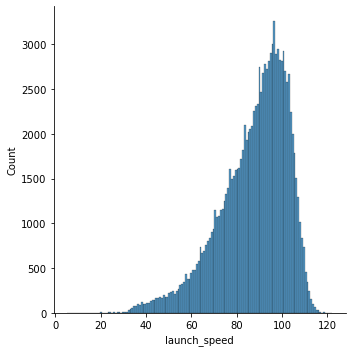

In [20]:
# Overall

sns.displot(df_nn_removed[(df_nn_removed.game_year == 2017)].launch_speed)

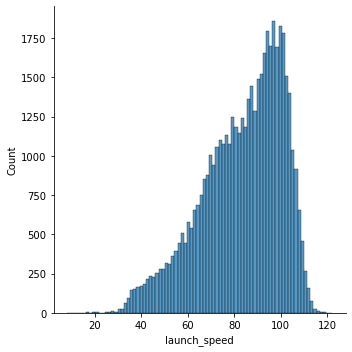

In [21]:
# Ground Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'ground_ball') & (df_nn_removed.game_year == 2017)].launch_speed)

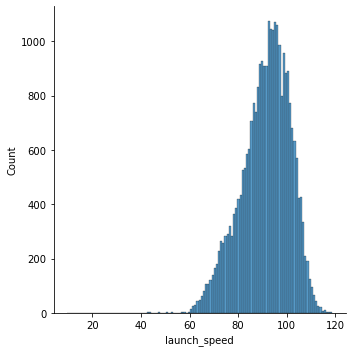

In [22]:
# Fly Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'fly_ball') & (df_nn_removed.game_year == 2017)].launch_speed)

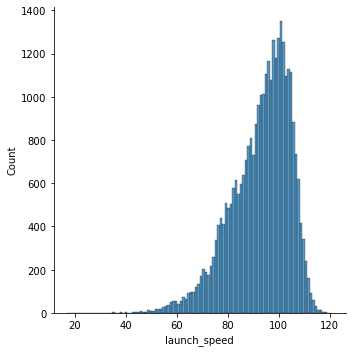

In [23]:
# Line Drive

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'line_drive') & (df_nn_removed.game_year == 2017)].launch_speed)

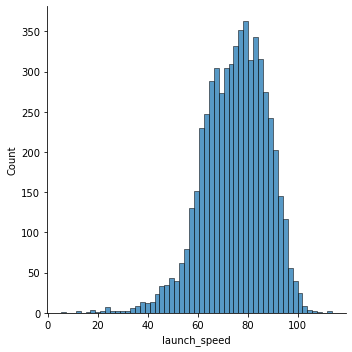

In [24]:
# Popup

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'popup') & (df_nn_removed.game_year == 2017)].launch_speed)

<br>

**2018 Batted Ball Type Launch Speed Distributions**

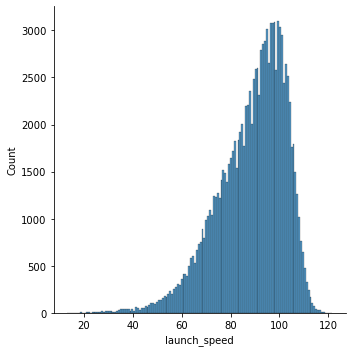

In [25]:
# Overall

sns.displot(df_nn_removed[(df_nn_removed.game_year == 2018)].launch_speed)

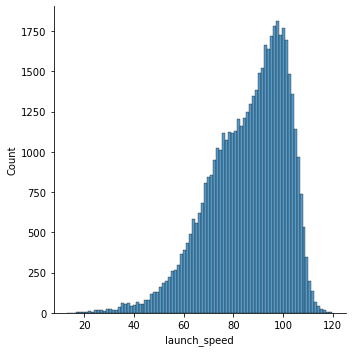

In [26]:
# Ground Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'ground_ball') & (df_nn_removed.game_year == 2018)].launch_speed)

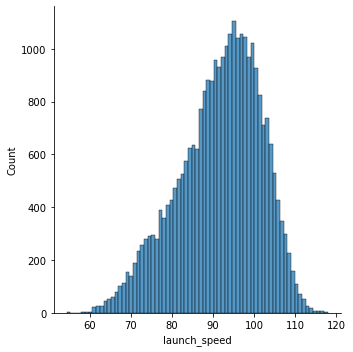

In [27]:
# Fly Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'fly_ball') & (df_nn_removed.game_year == 2018)].launch_speed)

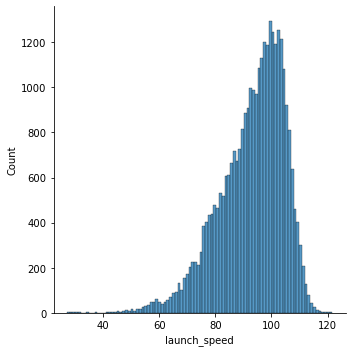

In [28]:
# Line Drive

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'line_drive') & (df_nn_removed.game_year == 2018)].launch_speed)

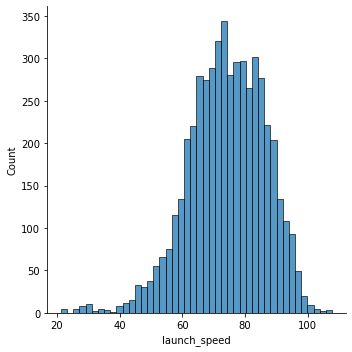

In [29]:
# Popup

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'popup') & (df_nn_removed.game_year == 2018)].launch_speed)

<br>

**2019 Batted Ball Type Launch Speed Distributions**

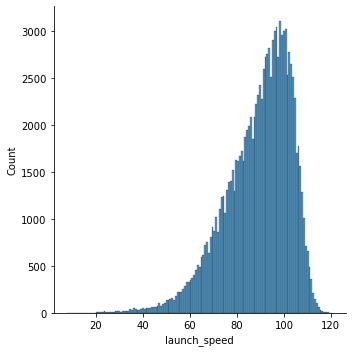

In [30]:
# Overall

sns.displot(df_nn_removed[(df_nn_removed.game_year == 2019)].launch_speed)

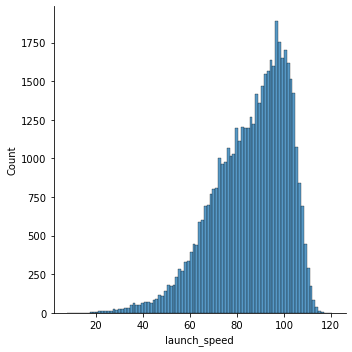

In [31]:
# Ground Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'ground_ball') & (df_nn_removed.game_year == 2019)].launch_speed)

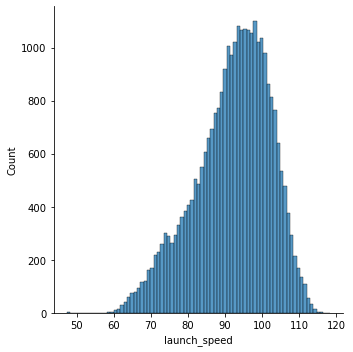

In [32]:
# Fly Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'fly_ball') & (df_nn_removed.game_year == 2019)].launch_speed)

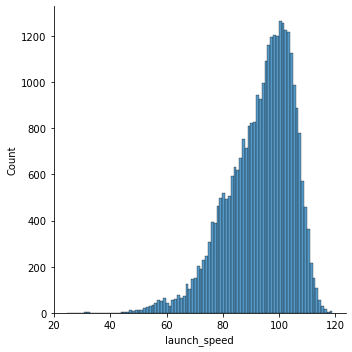

In [33]:
# Line Drive

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'line_drive') & (df_nn_removed.game_year == 2019)].launch_speed)

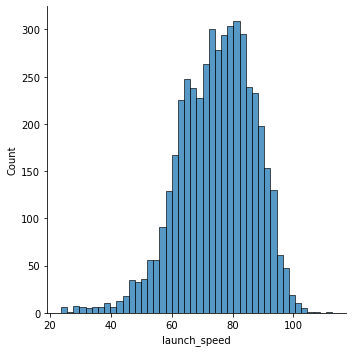

In [34]:
# Popup

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'popup') & (df_nn_removed.game_year == 2019)].launch_speed)

<br>

**2020 Batted Ball Type Launch Speed Distributions**

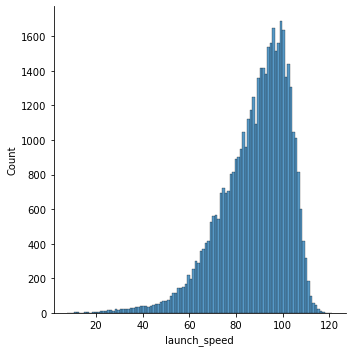

In [35]:
# Overall

sns.displot(df_nn_removed[(df_nn_removed.game_year == 2020)].launch_speed)

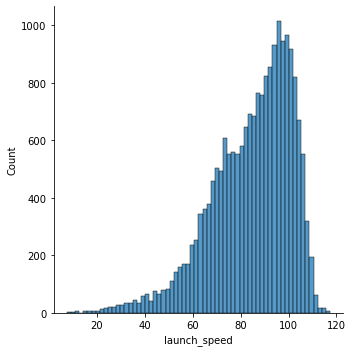

In [36]:
# Ground Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'ground_ball') & (df_nn_removed.game_year == 2020)].launch_speed)

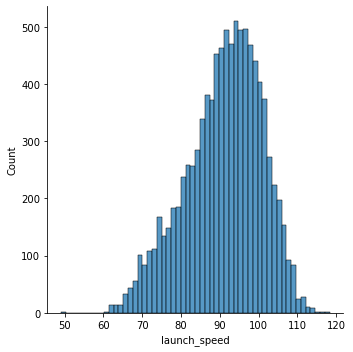

In [37]:
# Fly Ball

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'fly_ball') & (df_nn_removed.game_year == 2020)].launch_speed)

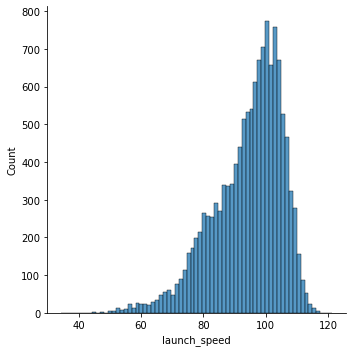

In [38]:
# Line Drive

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'line_drive') & (df_nn_removed.game_year == 2020)].launch_speed)

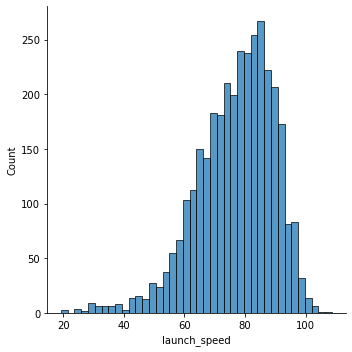

In [39]:
# Popup

sns.displot(df_nn_removed[(df_nn_removed.bb_type == 'popup') & (df_nn_removed.game_year == 2020)].launch_speed)

<br>

<br>
<br>

# Outlier Detection/Investigation

Text(0.5, 0, 'Launch Speed (Exit Velocity) Distribution')

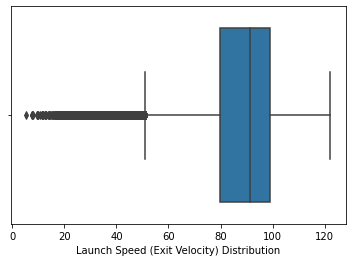

In [42]:
# Plot No Null Cleaned DF

ax = sns.boxplot(x=df_nn_removed['launch_speed'])
ax.set_xlabel('Launch Speed (Exit Velocity) Distribution')

In [43]:
# Let's use IQR Method

# Calculate Q1(25 percentile) & Q3(75 percentile) for Height column
Q1 = df_nn_removed['launch_speed'].quantile(0.25)
Q3 = df_nn_removed['launch_speed'].quantile(0.75)

# Calculate "IQR" for Height column
IQR = Q3 - Q1

#Interquartile range 
print(IQR)

19.299999999999997


In [44]:
Upper_Limit = Q3 + 1.5*IQR
Lower_Limit = Q1 - 1.5*IQR

print(f"Upper Limit : {Upper_Limit}")
print(f"Lower Limit : {Lower_Limit}")

Upper Limit : 128.15
Lower Limit : 50.95000000000001


In [45]:
# Find Potential Outliers

outliers = df_nn_removed['launch_speed'][(df_nn_removed['launch_speed']>Upper_Limit ) | (df_nn_removed['launch_speed'] < Lower_Limit)]

#print(f"Outliers in Launch Speed column : \n{outliers}\n")
print(f"Number of Outliers : {outliers.shape[0]}")

Number of Outliers : 7208


**Interpretation:**

About 7.2k observations, out of 393k are outliers (2%), if the IQR Method is used. At this point, two paths can be taken: remove perceived outliers or leave them in. It is a small percentage of the overall population, but it may have a large impact on the model's ability to predic launch speed. The case for removal is to combat the impact that outliers have. But, the case for leaving in, is that it is feasable for players to hit the ball quite softly (where most of outliers are). Knowing that the observed outliers are what I am deeming a "reasonable" outcome of a batted ball, I will not remove them. 

<br>
<br>

***

# Data Prep For Modeling

In [47]:
# Grab Only the Columns We Want

data = df_nn_removed[['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 
                 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis','zone', 'p_throws', 'stand', 
                 'pitch_name']]

In [48]:
# Check for Null Values

data.isnull().values.any()

True

In [49]:
# Okay, so which columns?

data.isnull().sum()

release_speed          17
release_pos_x          17
release_pos_z          17
pfx_x                  17
pfx_z                  17
plate_x                17
plate_z                17
vx0                    17
vy0                    17
vz0                    17
ax                     17
ay                     17
az                     17
sz_top                 17
sz_bot                 17
launch_speed            0
launch_angle            0
effective_speed       364
release_spin_rate    6013
release_extension     245
release_pos_y          17
spin_axis             213
zone                   17
p_throws                0
stand                   0
pitch_name            138
dtype: int64

In [50]:
# We do not feel comfortable imputing missing values here, so we will drop any row with missing data

data_clean = data.dropna()

data_clean.shape

(387486, 26)

In [51]:
# Double Check It Worked As Intended

# Okay, so which columns?

data_clean.isnull().sum()

release_speed        0
release_pos_x        0
release_pos_z        0
pfx_x                0
pfx_z                0
plate_x              0
plate_z              0
vx0                  0
vy0                  0
vz0                  0
ax                   0
ay                   0
az                   0
sz_top               0
sz_bot               0
launch_speed         0
launch_angle         0
effective_speed      0
release_spin_rate    0
release_extension    0
release_pos_y        0
spin_axis            0
zone                 0
p_throws             0
stand                0
pitch_name           0
dtype: int64

In [52]:
# Briefly Describe Cleaned Launch Speed Distribution

data_clean['launch_speed'].describe().T

count    387486.000000
mean         88.383734
std          14.383640
min           5.200000
25%          79.900000
50%          91.200000
75%          99.200000
max         122.200000
Name: launch_speed, dtype: float64

<br>

### Create X and Y 

In [53]:
# X
x = data_clean.drop(['launch_speed'],1)


# Y
y = data_clean['launch_speed']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [54]:
# Turn x categorical variables into dummies

x = pd.get_dummies(x, columns=['zone', 'p_throws', 'stand', 'pitch_name'])

x.columns

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'launch_angle', 'effective_speed', 'release_spin_rate',
       'release_extension', 'release_pos_y', 'spin_axis', 'zone_1.0',
       'zone_2.0', 'zone_3.0', 'zone_4.0', 'zone_5.0', 'zone_6.0', 'zone_7.0',
       'zone_8.0', 'zone_9.0', 'zone_11.0', 'zone_12.0', 'zone_13.0',
       'zone_14.0', 'p_throws_L', 'p_throws_R', 'stand_L', 'stand_R',
       'pitch_name_2-Seam Fastball', 'pitch_name_4-Seam Fastball',
       'pitch_name_Changeup', 'pitch_name_Curveball', 'pitch_name_Cutter',
       'pitch_name_Eephus', 'pitch_name_Fastball', 'pitch_name_Forkball',
       'pitch_name_Knuckle Curve', 'pitch_name_Knuckleball',
       'pitch_name_Screwball', 'pitch_name_Sinker', 'pitch_name_Slider',
       'pitch_name_Split-Finger'],
      dtype='object')

In [55]:
# Look at shape

print(x.shape)
print(y.shape)

(387486, 52)
(387486,)


In [56]:
# Split Into Sets

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state = 21)

print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(271240, 52)
(116246, 52)
(271240,)
(116246,)


<br>
<br>

***

# Model Process: Train Baseline, Cross Validate, Final Model pip install xgboost

In [ ]:
pip install xgboost

In [57]:
import xgboost as xgb
import time

from sklearn.metrics import r2_score,mean_squared_error, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

<br>

### Baseline Model

In [58]:
# Run Model with Default Settings

start = time.time()

model = xgb.XGBRegressor(seed=21)

model.fit(x_train, y_train)

print('Runtime: ', time.time() - start)

Runtime:  13.96941351890564


In [59]:
# Evaluate Model

# Evaluate
y_pred = model.predict(x_test)


# R^2
print('R^2 = ', r2_score(y_test, y_pred))
# MAE
print('MAE = ', mean_absolute_error(y_test, y_pred))
# RMSE
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 =  0.4027955489169234
MAE =  8.515547199688013
RMSE =  11.14487323734746


**Interpretation:**

**R^2:** 0.40 isn't fantastic, but it's not terrible. The closer to 1 would be ideal, but we will see if this can be improved upon. 

**MAE:** 8.52 mph seems to be an "okay" value for the Mean Absolute Error. We'd like it to be lower and will try to improve the results! 

**RMSE:** 11.14 mph is a little higher than the MAE and is a bit more sensitive to when the model makes an incorrect prediction of a higher magnitude. 

<br>

### Model Performance Improvement Investigation: RandomizedSearchCV

In [ ]:
# Define Parameters for CV
'''
param_grid_to_test = {
    'max_depth': [3,4,5,6,7,8,9,10],
    'learning_rate': [0.01,0.07,0.13,0.19,0.25,0.3],
    'n_estimators': [100, 280, 460, 640, 820, 1000],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8, 0.9, 1],
    'sub_sample': [0.5, 0.6, 0.7, 0.8, 0.9, 1], 
    'min_child_weight': [1,2,3,4,5,6],
    'alpha': [0, 1, 5, 10, 15],
    'lambda': [0, 1, 5, 10, 15],
    'gamma': [0, 1, 2, 3, 4, 5]
}
'''

In [ ]:
# Informed Grid Search CV Approach

params_testing = {
    'gamma': [0, 1, 2, 3, 4, 5]
        }


model = xgb.XGBRegressor(seed=21, verbosity = 0)


grid_search = GridSearchCV(
        estimator = model, 
        param_grid = params_testing, 
        scoring = 'neg_mean_squared_error', 
        n_jobs = 1, 
        cv = 10,
        verbose = True
        )


start = time.time()
grid_search.fit(x_train,y_train)
print('Runtime: ', time.time() - start)


print("Best parameters:", grid_search.best_params_)
print("Lowest RMSE: ", (np.sqrt(-grid_search.best_score_)))

<br>

### Run with Previously Tuned Model's Parameters

In [60]:
# Run Model with Default Settings

start = time.time()

model = xgb.XGBRegressor(seed = 21, max_depth = 6, learning_rate = 0.19,
                         n_estimators = 100, colsample_bytree = 0.9, sub_sample = 0.5,
                         alpha = 15, lamba = 15, gamma = 1, min_child_weight = 2)

model.fit(x_train, y_train)

print('Runtime: ', time.time() - start)

[21:32:18] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Runtime:  13.904317617416382


In [61]:
# Evaluate Model

# Evaluate
y_pred = model.predict(x_test)


# R^2
print('R^2 = ', r2_score(y_test, y_pred))
# MAE
print('MAE = ', mean_absolute_error(y_test, y_pred))
# RMSE
print('RMSE = ', np.sqrt(mean_squared_error(y_test, y_pred)))

R^2 =  0.4048630893736046
MAE =  8.51611766352812
RMSE =  11.12556456148162


**Interpretation:**

As you can see, the tuned model's performance is actually slightly better than the base model. So, we will move forward with this one. 

<br>

### Feature Importance

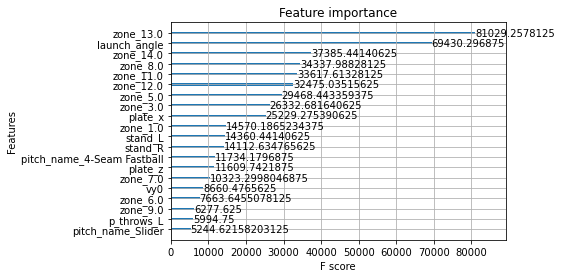

In [62]:
# Feature Importance
from xgboost import plot_importance
import matplotlib.pyplot as plt

# plot feature importance
plot_importance(model, max_num_features=20, importance_type = 'gain')
plt.show()

<br>

### Now, let's experiment with feature selection.

In [63]:
from sklearn.feature_selection import SelectFromModel

threshold = np.sort(model.feature_importances_)[20:]

len(threshold)

32

In [64]:
threshold

array([0.00379325, 0.00400005, 0.00443321, 0.00470003, 0.00470632,
       0.00475665, 0.00585787, 0.00604245, 0.00712676, 0.00714804,
       0.00734766, 0.00864867, 0.00981128, 0.01121457, 0.01174375,
       0.01433662, 0.01620142, 0.01931212, 0.02171871, 0.02195149,
       0.02640094, 0.02686452, 0.0272569 , 0.04719719, 0.04926137,
       0.05512753, 0.06075206, 0.06288952, 0.06423714, 0.06993811,
       0.12988542, 0.15158395], dtype=float32)

In [65]:
for thresh in threshold:
    
    # select features using threshold
    selection = SelectFromModel(model, threshold=thresh, prefit=True)
    select_x_train = selection.transform(x_train)
    
    # train model
    selection_model = xgb.XGBRegressor(seed = 21, max_depth = 6, learning_rate = 0.19,
                         n_estimators = 100, colsample_bytree = 0.9, sub_sample = 0.5,
                         alpha = 15, lamba = 15, gamma = 1, min_child_weight = 2)
    selection_model.fit(select_x_train, y_train)
    
    # eval model
    select_x_test = selection.transform(x_test)
    y_pred = selection_model.predict(select_x_test)
    predictions = [round(value) for value in y_pred]
    RMSE = np.sqrt(mean_squared_error(y_test, predictions))
    
    print("Thresh=%.3f, n=%d, RMSE: %.2f mph" % (thresh, select_x_train.shape[1], RMSE))

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


[21:34:08] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.004, n=32, RMSE: 11.10 mph
[21:34:21] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.004, n=31, RMSE: 11.12 mph
[21:34:34] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.004, n=30, RMSE: 11.11 mph
[21:34:46] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=29, RMSE: 11.16 mph
[21:34:57] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=28, RMSE: 11.13 mph
[21:35:09] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.005, n=27, RMSE: 11.16 mph
[21:35:20] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=26, RMSE: 11.17 mph
[21:35:32] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.006, n=25, RMSE: 11.16 mph
[21:35:43] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=24, RMSE: 11.17 mph
[21:35:54] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=23, RMSE: 11.23 mph
[21:36:05] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.007, n=22, RMSE: 11.23 mph
[21:36:17] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.009, n=21, RMSE: 11.25 mph
[21:36:28] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.010, n=20, RMSE: 11.24 mph
[21:36:39] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.011, n=19, RMSE: 11.24 mph
[21:36:50] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.012, n=18, RMSE: 11.28 mph
[21:37:01] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.014, n=17, RMSE: 11.28 mph
[21:37:11] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.016, n=16, RMSE: 11.29 mph
[21:37:23] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.019, n=15, RMSE: 11.38 mph
[21:37:27] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=14, RMSE: 11.38 mph
[21:37:31] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.022, n=13, RMSE: 11.59 mph
[21:37:35] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.026, n=12, RMSE: 11.67 mph
[21:37:39] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.027, n=11, RMSE: 11.66 mph
[21:37:44] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.027, n=10, RMSE: 11.97 mph
[21:37:48] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.047, n=9, RMSE: 11.98 mph
[21:37:52] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.049, n=8, RMSE: 12.22 mph
[21:37:56] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.055, n=7, RMSE: 12.22 mph
[21:38:00] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.061, n=6, RMSE: 12.29 mph
[21:38:03] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.063, n=5, RMSE: 12.37 mph
[21:38:07] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.064, n=4, RMSE: 12.53 mph
[21:38:10] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.070, n=3, RMSE: 12.57 mph
[21:38:13] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.130, n=2, RMSE: 12.76 mph
[21:38:15] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


Thresh=0.152, n=1, RMSE: 14.31 mph


/opt/conda/lib/python3.7/site-packages/sklearn/base.py:439: UserWarning: X has feature names, but SelectFromModel was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


<br>

<br>

**We see from here that using the top 32 features resulted in an RMSE of 11.10 mph. Let's see which features they are and use those in the model.**

In [66]:
# 

results = pd.DataFrame()

results['columns'] = x.columns
results['importances'] = model.feature_importances_
results.sort_values(by='importances', ascending=False, inplace=True)

results[:32]

,columns,importances
32,zone_13.0,0.151584
15,launch_angle,0.129885
33,zone_14.0,0.069938
28,zone_8.0,0.064237
30,zone_11.0,0.062890
31,zone_12.0,0.060752
25,zone_5.0,0.055128
23,zone_3.0,0.049261
5,plate_x,0.047197
21,zone_1.0,0.027257


In [67]:
list = results['columns'][:32].to_list()

In [68]:
print(len(list))

32


In [69]:
list

['zone_13.0',
 'launch_angle',
 'zone_14.0',
 'zone_8.0',
 'zone_11.0',
 'zone_12.0',
 'zone_5.0',
 'zone_3.0',
 'plate_x',
 'zone_1.0',
 'stand_L',
 'stand_R',
 'pitch_name_4-Seam Fastball',
 'plate_z',
 'zone_7.0',
 'vy0',
 'zone_6.0',
 'zone_9.0',
 'p_throws_L',
 'pitch_name_Slider',
 'zone_4.0',
 'pitch_name_Changeup',
 'release_speed',
 'pfx_x',
 'pitch_name_Sinker',
 'pitch_name_Cutter',
 'sz_bot',
 'release_pos_x',
 'effective_speed',
 'pfx_z',
 'az',
 'sz_top']

In [70]:
# Let's run the model with these features

# Filter Data

x_fs = x[['zone_13.0',
 'launch_angle',
 'zone_14.0',
 'zone_8.0',
 'zone_11.0',
 'zone_12.0',
 'zone_5.0',
 'zone_3.0',
 'plate_x',
 'zone_1.0',
 'stand_L',
 'stand_R',
 'pitch_name_4-Seam Fastball',
 'plate_z',
 'zone_7.0',
 'vy0',
 'zone_6.0',
 'zone_9.0',
 'p_throws_L',
 'pitch_name_Slider',
 'zone_4.0',
 'pitch_name_Changeup',
 'release_speed',
 'pfx_x',
 'pitch_name_Sinker',
 'pitch_name_Cutter',
 'sz_bot',
 'release_pos_x',
 'effective_speed',
 'pfx_z',
 'az',
 'sz_top']]

In [71]:
x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(x_fs,y, test_size=0.3, random_state = 21)

print(x_train_fs.shape)
print(x_test_fs.shape)
print(y_train_fs.shape)
print(y_test_fs.shape)

(271240, 32)
(116246, 32)
(271240,)
(116246,)


In [72]:
# Run Model with Default Settings

start = time.time()

model_final = xgb.XGBRegressor(seed = 21, max_depth = 6, learning_rate = 0.19,
                         n_estimators = 100, colsample_bytree = 0.9, sub_sample = 0.5,
                         alpha = 15, lamba = 15, gamma = 1, min_child_weight = 2)

model_final.fit(x_train_fs, y_train_fs)

print('Runtime: ', time.time() - start)

[21:39:22] WARNING: ../src/learner.cc:576: 
Parameters: { "lamba", "sub_sample" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


Runtime:  13.899661779403687


In [73]:
# Evaluate Model

# Evaluate
y_pred = model_final.predict(x_test_fs)


# R^2
print('R^2 = ', r2_score(y_test_fs, y_pred))
# MAE
print('MAE = ', mean_absolute_error(y_test_fs, y_pred))
# RMSE
print('RMSE = ', np.sqrt(mean_squared_error(y_test_fs, y_pred)))

R^2 =  0.40812753947616953
MAE =  8.480740957997009
RMSE =  11.095009582530434


<br>

**Interpretation:** Using feature selection, the performance of the model is marginally better when evaluating R^2, MAE, and RMSE. There is a slight gain in run time. I would argue that with the goal of simplicity in mind, we should move forward with the baseline model and the selected features. 

<br>
<br>
<br>

***

# Load 2021 Data and Prep for Modeling

In [74]:
# Load Data

prod = pd.read_csv('gs://sean_sullivan_projects/MLB_EVOE_Project/January_2022_Data/January_2022_Refresh_Data_Production.csv')

In [75]:
# Only use columns of interest

prod_1 = prod[['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 
                 'launch_speed', 'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis','zone', 'p_throws', 'stand', 
                 'pitch_name', 'batter', 'pitcher']]

prod_1.shape

(123147, 28)

In [76]:
# Check for Null Values

prod_1.isnull().values.any()

True

In [77]:
# Okay, so which columns?

prod_1.isnull().sum()

release_speed          0
release_pos_x          0
release_pos_z          0
pfx_x                  0
pfx_z                  0
plate_x                0
plate_z                0
vx0                    0
vy0                    0
vz0                    0
ax                     0
ay                     0
az                     0
sz_top                 0
sz_bot                 0
launch_speed           0
launch_angle           0
effective_speed        0
release_spin_rate    405
release_extension    416
release_pos_y          0
spin_axis            405
zone                   0
p_throws               0
stand                  0
pitch_name             0
batter                 0
pitcher                0
dtype: int64

In [78]:
# We do not feel comfortable imputing missing values here, so we will drop any row with missing data

prod_clean = prod_1.dropna()

prod_clean.shape

(122716, 28)

In [79]:
# Double Check It Worked As Intended

prod_clean.isnull().sum()

release_speed        0
release_pos_x        0
release_pos_z        0
pfx_x                0
pfx_z                0
plate_x              0
plate_z              0
vx0                  0
vy0                  0
vz0                  0
ax                   0
ay                   0
az                   0
sz_top               0
sz_bot               0
launch_speed         0
launch_angle         0
effective_speed      0
release_spin_rate    0
release_extension    0
release_pos_y        0
spin_axis            0
zone                 0
p_throws             0
stand                0
pitch_name           0
batter               0
pitcher              0
dtype: int64

<br>

### Evaluate Variable Distributions and Launch Speed Histogram

In [80]:
# Numeric Variable Exploration

num_var = prod_clean[['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z', 'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top', 'sz_bot', 'launch_speed', 
              'launch_angle', 'effective_speed', 'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis']]

In [81]:
num_var.describe().T

,count,mean,std,min,25%,50%,75%,max
release_speed,122716.0,88.926213,5.964826,30.100000,84.900000,90.000000,93.700000,102.500000
release_pos_x,122716.0,-0.681322,1.892853,-4.630000,-2.050000,-1.400000,1.300000,4.480000
release_pos_z,122716.0,5.853936,0.540867,1.000000,5.610000,5.890000,6.180000,7.730000
pfx_x,122716.0,-0.124394,0.881088,-2.310000,-0.890000,-0.210000,0.590000,2.400000
pfx_z,122716.0,0.661657,0.704335,-2.130000,0.240000,0.760000,1.230000,2.430000
plate_x,122716.0,0.003719,0.545457,-2.080000,-0.380000,0.000000,0.390000,2.390000
plate_z,122716.0,2.354087,0.572246,0.090000,1.950000,2.340000,2.750000,5.030000
vx0,122716.0,2.001597,5.679707,-16.608454,-3.312000,3.851532,6.278777,16.162399
vy0,122716.0,-129.361169,8.632199,-148.992834,-136.202530,-130.859293,-123.515218,-40.422498
vz0,122716.0,-3.956510,2.753711,-13.125103,-5.811277,-4.134107,-2.339752,13.967712


In [82]:
# Categorical Variable Exploration

cat_var = prod_clean[['zone', 'p_throws', 'stand', 'pitch_name']]

In [83]:
for i in cat_var:
    print()
    print(cat_var[i].value_counts())
    print('---------------------------------------------')


5     18907
8     14341
4     13636
6     13123
9     10131
7      8915
2      8599
14     8223
13     6677
1      5983
3      5246
11     4868
12     4067
Name: zone, dtype: int64
---------------------------------------------

R    85826
L    36890
Name: p_throws, dtype: int64
---------------------------------------------

R    73770
L    48946
Name: stand, dtype: int64
---------------------------------------------

4-Seam Fastball    41052
Sinker             22253
Slider             21990
Changeup           16030
Cutter              8731
Curveball           8659
Knuckle Curve       1956
Split-Finger        1814
Fastball             197
Eephus                18
Knuckleball           15
Screwball              1
Name: pitch_name, dtype: int64
---------------------------------------------


In [84]:
# Briefly Describe Cleaned Launch Speed Distribution

prod_clean['launch_speed'].describe().T

count    122716.000000
mean         88.069332
std          15.361367
min           7.100000
25%          79.600000
50%          91.100000
75%          99.400000
max         122.200000
Name: launch_speed, dtype: float64

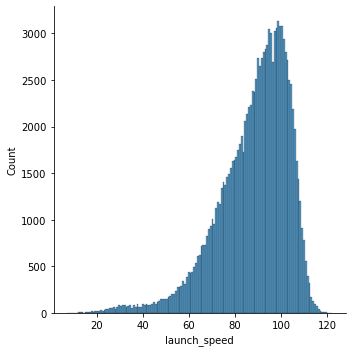

In [85]:
# Final launch speed distribution

sns.displot(prod_clean.launch_speed)

<br>

### Generate dummy variables and grab x variables

In [86]:
# Generate dummy variables

prod_clean_dummies = pd.get_dummies(prod_clean, columns=['zone', 'p_throws', 'stand', 'pitch_name'])

prod_clean_dummies.columns

Index(['release_speed', 'release_pos_x', 'release_pos_z', 'pfx_x', 'pfx_z',
       'plate_x', 'plate_z', 'vx0', 'vy0', 'vz0', 'ax', 'ay', 'az', 'sz_top',
       'sz_bot', 'launch_speed', 'launch_angle', 'effective_speed',
       'release_spin_rate', 'release_extension', 'release_pos_y', 'spin_axis',
       'batter', 'pitcher', 'zone_1', 'zone_2', 'zone_3', 'zone_4', 'zone_5',
       'zone_6', 'zone_7', 'zone_8', 'zone_9', 'zone_11', 'zone_12', 'zone_13',
       'zone_14', 'p_throws_L', 'p_throws_R', 'stand_L', 'stand_R',
       'pitch_name_4-Seam Fastball', 'pitch_name_Changeup',
       'pitch_name_Curveball', 'pitch_name_Cutter', 'pitch_name_Eephus',
       'pitch_name_Fastball', 'pitch_name_Knuckle Curve',
       'pitch_name_Knuckleball', 'pitch_name_Screwball', 'pitch_name_Sinker',
       'pitch_name_Slider', 'pitch_name_Split-Finger'],
      dtype='object')

In [87]:
# Get X varibles

x_prod = prod_clean_dummies[['zone_13','launch_angle','zone_14','zone_8','zone_11','zone_12','zone_5','zone_3','plate_x','zone_1','stand_L','stand_R',
           'pitch_name_4-Seam Fastball','plate_z','zone_7','vy0','zone_6','zone_9','p_throws_L','pitch_name_Slider','zone_4','pitch_name_Changeup',
           'release_speed','pfx_x','pitch_name_Sinker','pitch_name_Cutter','sz_bot','release_pos_x','effective_speed','pfx_z','az','sz_top']]

x_prod.shape

(122716, 32)

<br>

### Run Through Final Model

In [88]:
# Run through model

y_pred_2021 = model_final.predict(x_prod)

In [89]:
# Take predictions and turn into a list + attach as a column to prod_clean DF

prod_clean['predicted_launch_speed'] = y_pred_2021.tolist()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [90]:
# Generate difference of actual launch speed and predicted launch speed

prod_clean['launch_speed_difference'] = prod_clean['launch_speed'] - prod_clean['predicted_launch_speed']

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [91]:
# Look at results using .head()

prod_clean[['launch_speed', 'predicted_launch_speed', 'launch_speed_difference']].head()

,launch_speed,predicted_launch_speed,launch_speed_difference
0,88.9,90.577217,-1.677217
1,101.1,99.396729,1.703271
2,69.8,81.775612,-11.975612
3,105.0,98.974892,6.025108
4,93.2,93.161400,0.038600


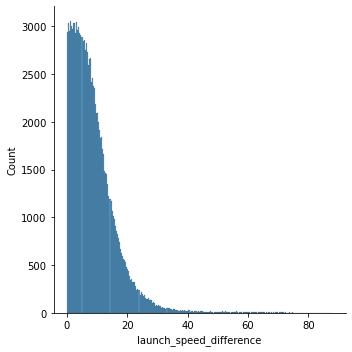

In [92]:
# Launch Speed Difference Distribution (Absolute Value)

sns.displot(prod_clean.launch_speed_difference.abs())

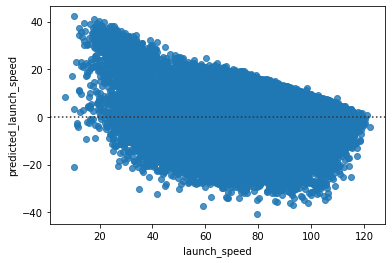

In [93]:
# Draw Residual Plot

sns.residplot(x = 'launch_speed',
              y = 'predicted_launch_speed',
              data = prod_clean
             )

plt.show()

<br>

### Save Results

In [ ]:
prod_clean.to_csv('gs://sean_sullivan_projects/MLB_EVOE_Project/January_2022_Data/results_2021.csv')